# **LABORATORIO 5: – USO DE BITalino PARA ECG**


**Tabla de contenidos**

1. [Introducción](#id1)
2. [Objetivos](#id2)
3. [Materiales y equipos](#id3)
4. [Resultados](#id4)\
   4.1 [Conexión usada](#id5)\
   4.2 [Estado basal](#id6)\
   4.3 [Manteniendo la respiración por 10 segundos](#id7)\
   4.4 [Reposo basal](#id8)\
   4.5 [Después de una actividad física](#id9)\
   4.6 [Señal del Promsim4](#id10)\
   4.7 [Archivos](#id11)
6. [Conclusiones](#id12)
7. [Recomendaciones](#id13)
6. [Referencias bibliográficas](#id14)


## **1. Introducción** <a name="id1"></a>
AAAAA

## **2. Objetivos** <a name="id2"></a>

---
* Adquirir señales biomédicas de ECG
* Hacer una correcta configuración de BiTalino.
* Extraer la información de las señales ECG del software OpenSignals (r)evolution
* Plotear las señales en dominio del tiempo y frecuencia en Python

## **3. Materiales y equipos** <a name="id3"></a>

---

<div align="center">

|  **Modelo**  | **Descripción** | **Cantidad** |
|:------------:|:---------------:|:------------:|
| (R)EVOLUTION |   Kit BITalino  |       1      |
|       -      |      Laptop     |       1      |
|       -      |    Electrodos superficiales   |       3      |
<div align="center"> Tabla 1: Materiales y equipos</i></div>


</div>

<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/image_materiales.jpg" width="400" height="266"></p>
<div align="center">Figura 2: Kit BITalino y electrodos de superficie</i></div>
</p>

## **4. Resultados** <a name="id4"></a>

---

### **4.1. Conexión usada** <a name="id5"></a>

Se utilizó la conexión EMG en la placa Bitalino utilizando el sensor EMG de 3 electrodos como se muestra a continuación.
<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/bitalino.jpg" width="400" height="266"></p>
</p>
El siguiente procedimiento consiste en colocar los electrodos EMG en el usuario de prueba. Para ello se utilizó la Guía De Procedimiento de Electromiografía y Velocidad de Conducción de nervios periféricos (2020) elaborada por el Instituto Nacional del Niño de San Borja para el Ministerio de Salud (MINSA) - GP-001/INSNSB/UAIE/SUAIEPSE – NEUROLOGIA PEDIATRICA V01 (RD N° 000226-2020-DG-INSNSB) [4].

### **4.2. Estado basal** <a name="id6"></a>

* 1era derivada

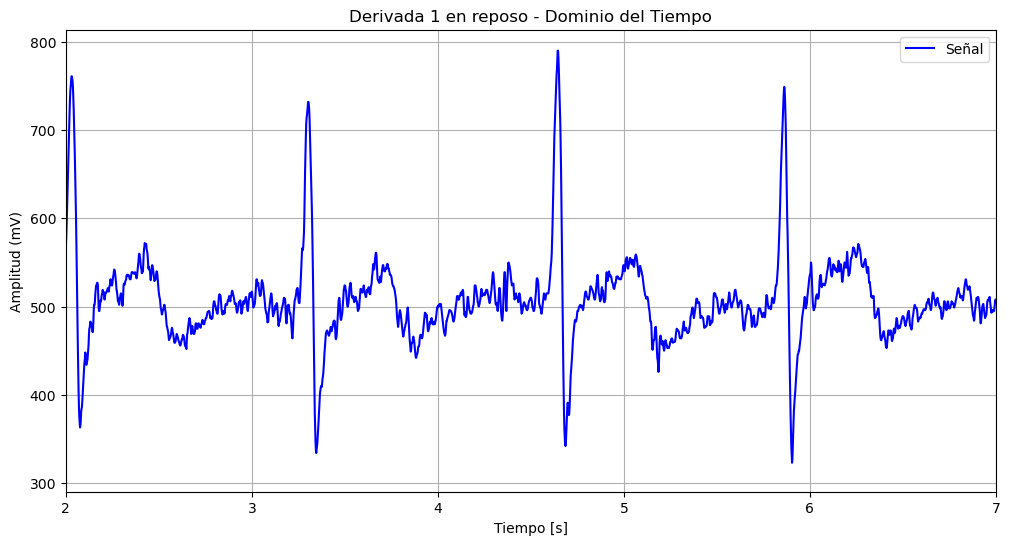

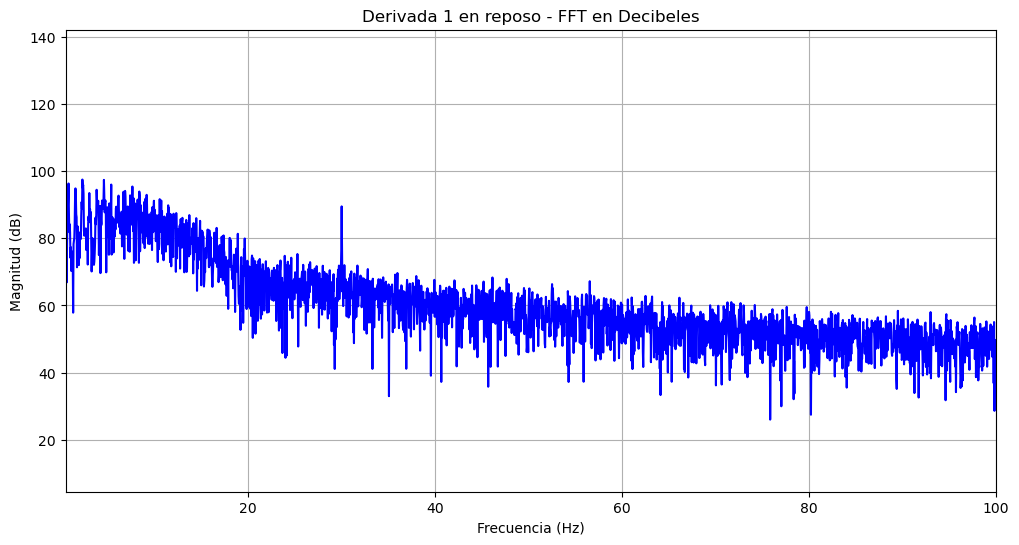

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/reposoD1.txt', comments='#',skiprows=4)

# Extraer la data
reposoD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(reposoD1, 'Derivada 1 en reposo', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(reposoD1, 'Derivada 1 en reposo', fs)

* 2da derivada

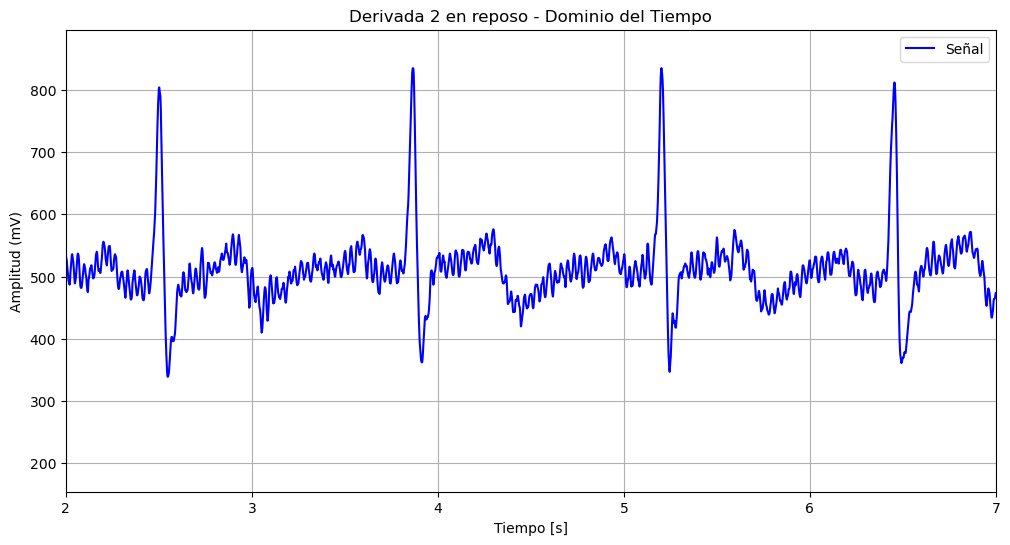

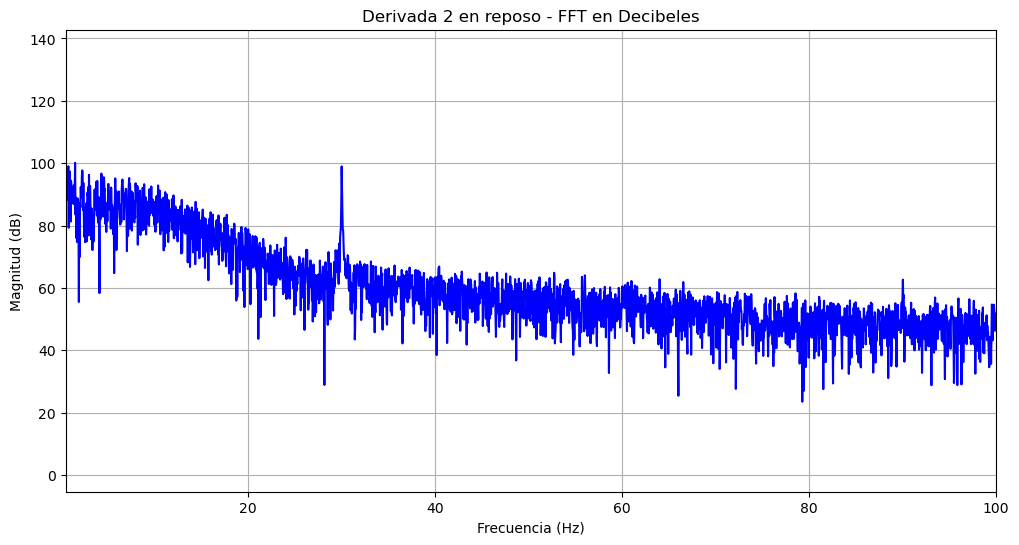

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/reposoD2.txt', comments='#',skiprows=4)

# Extraer la data
reposoD2 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD2)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(reposoD2, 'Derivada 2 en reposo', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(reposoD2, 'Derivada 2 en reposo', fs)

* 3era derivada

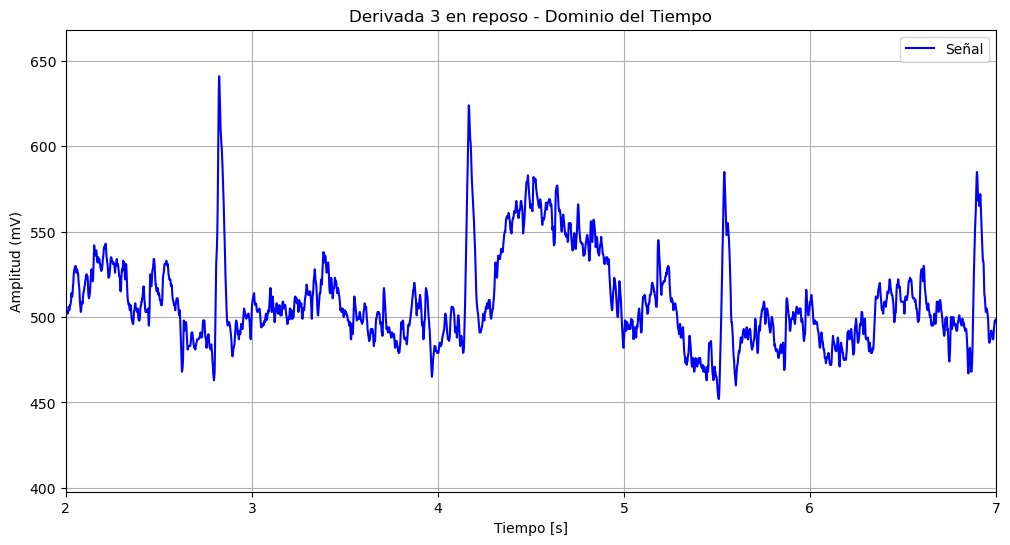

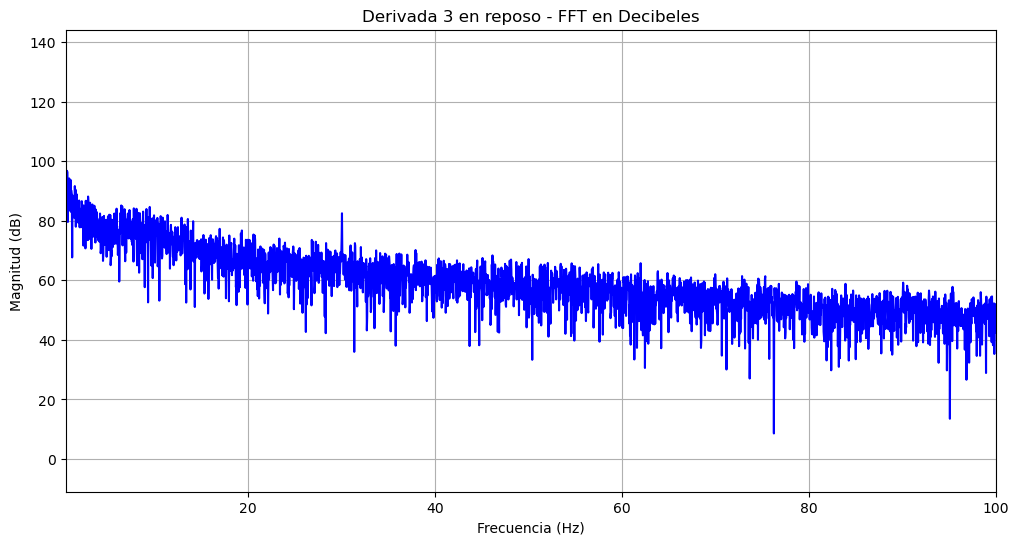

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/reposoD3.txt', comments='#',skiprows=4)

# Extraer la data
reposoD3 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD3)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(reposoD3, 'Derivada 3 en reposo', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(reposoD3, 'Derivada 3 en reposo', fs)

### **4.3. Manteniendo la respiración por 10 segundos** <a name="id7"></a>

* 1era derivada

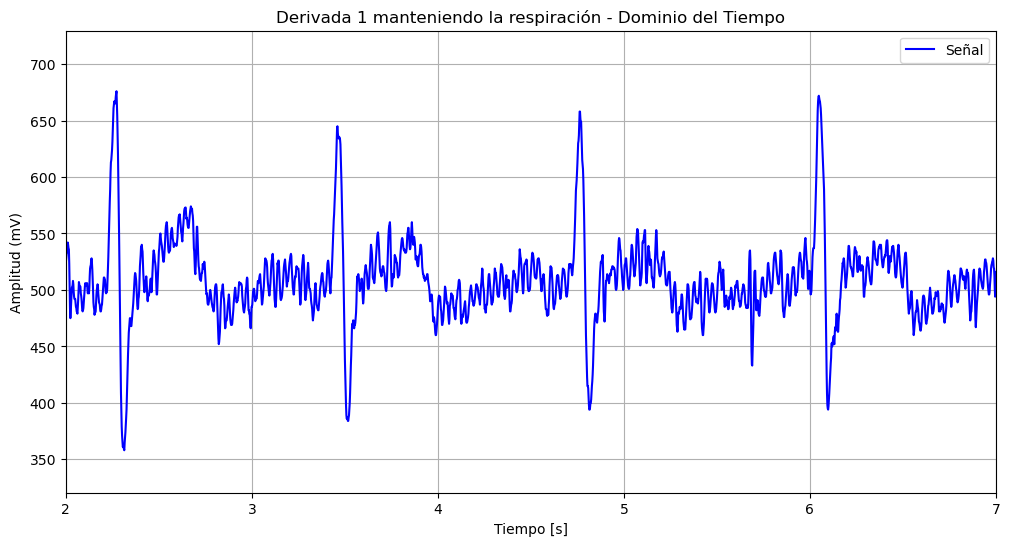

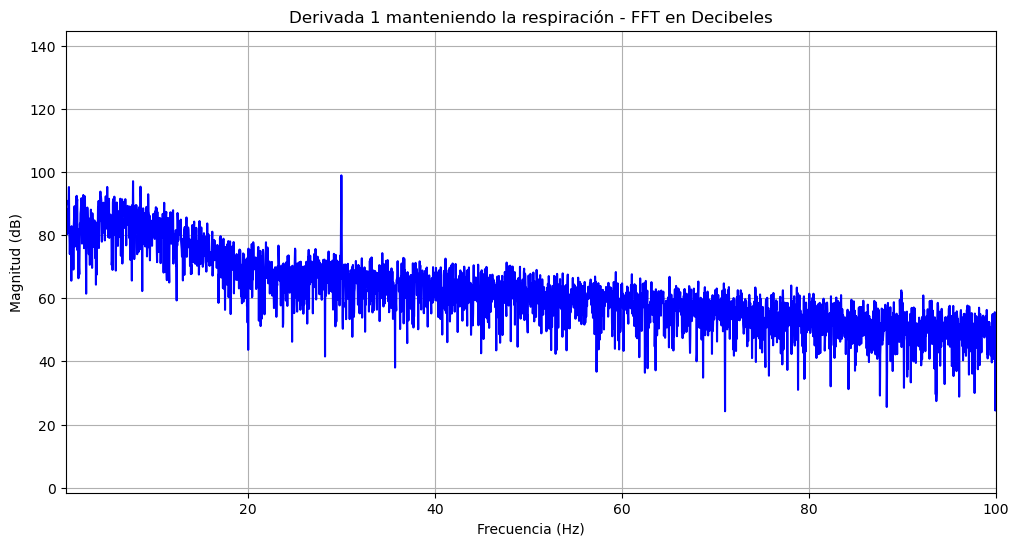

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/RespD1.txt', comments='#',skiprows=4)

# Extraer la data
RespD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(RespD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(RespD1, 'Derivada 1 manteniendo la respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(RespD1, 'Derivada 1 manteniendo la respiración', fs)

* 2da derivada

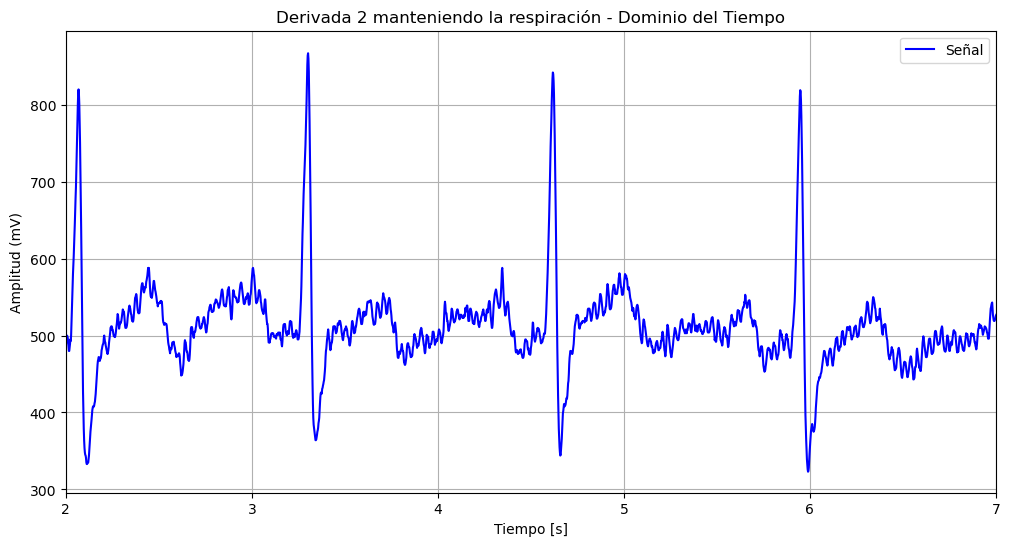

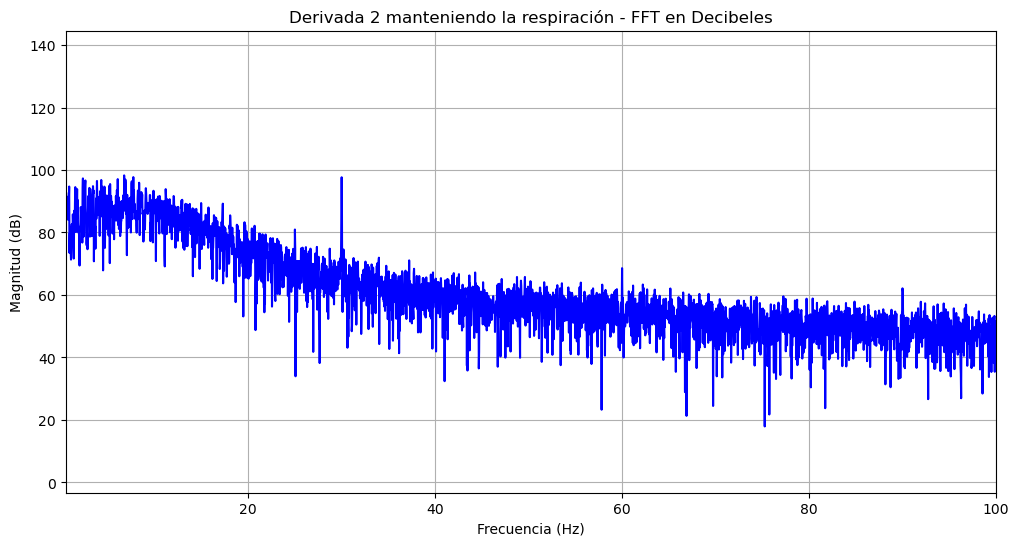

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/RespD2.txt', comments='#',skiprows=4)

# Extraer la data
RespD2 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(RespD2)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(RespD2, 'Derivada 2 manteniendo la respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(RespD2, 'Derivada 2 manteniendo la respiración', fs)

* 3era derivada

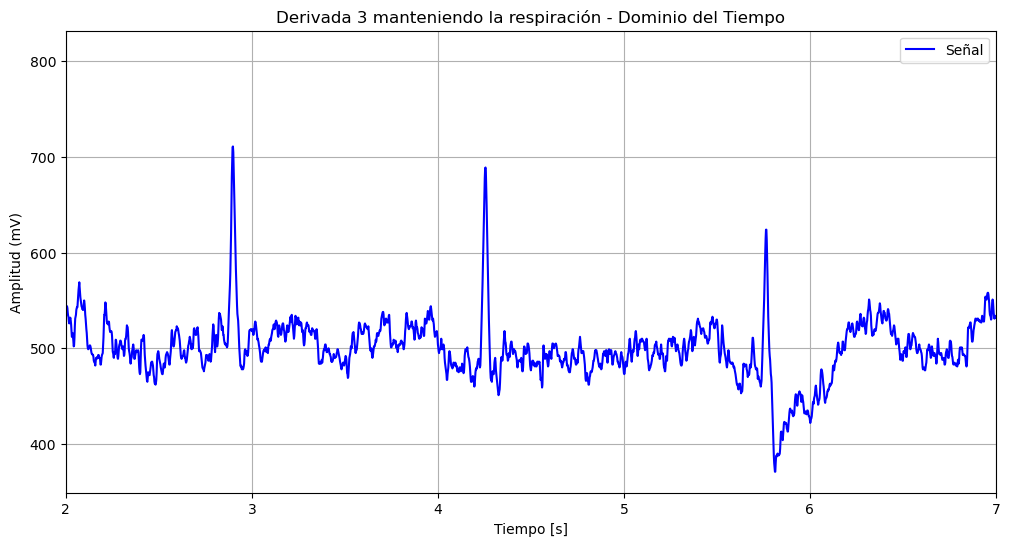

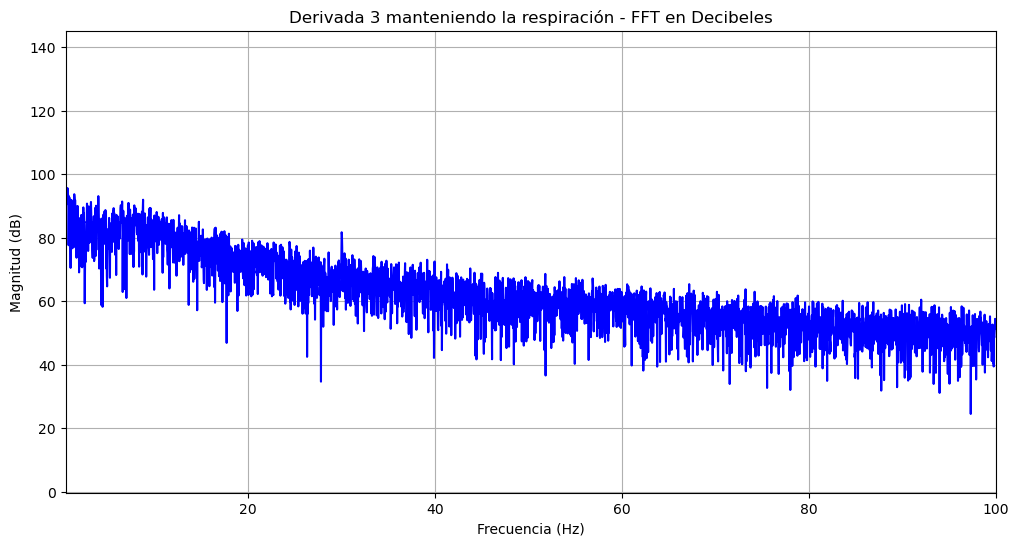

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/RespD3.txt', comments='#',skiprows=4)

# Extraer la data
RespD3 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(RespD3)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(RespD3, 'Derivada 3 manteniendo la respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(RespD3, 'Derivada 3 manteniendo la respiración', fs)

### **4.4. Reposo basal post respiración** <a name="id8"></a>

* 1era derivada

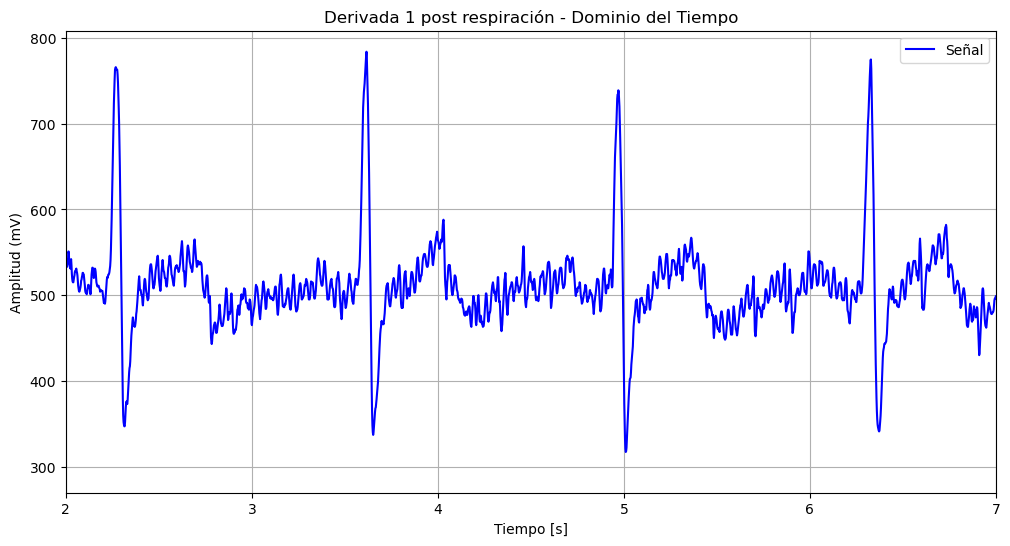

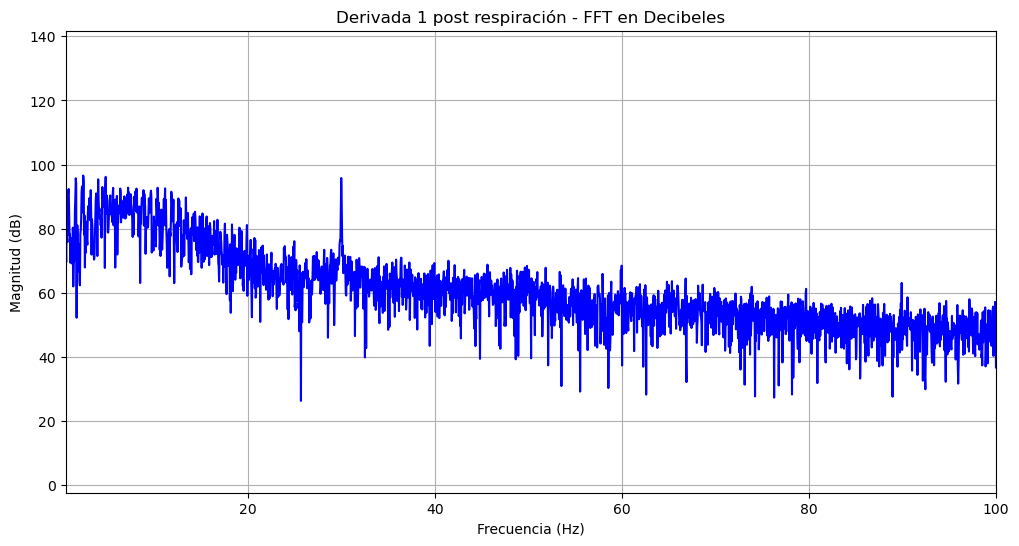

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/postRespD1.txt', comments='#',skiprows=4)

# Extraer la data
postRespD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(postRespD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(postRespD1, 'Derivada 1 post respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(postRespD1, 'Derivada 1 post respiración', fs)

* 2da derivada

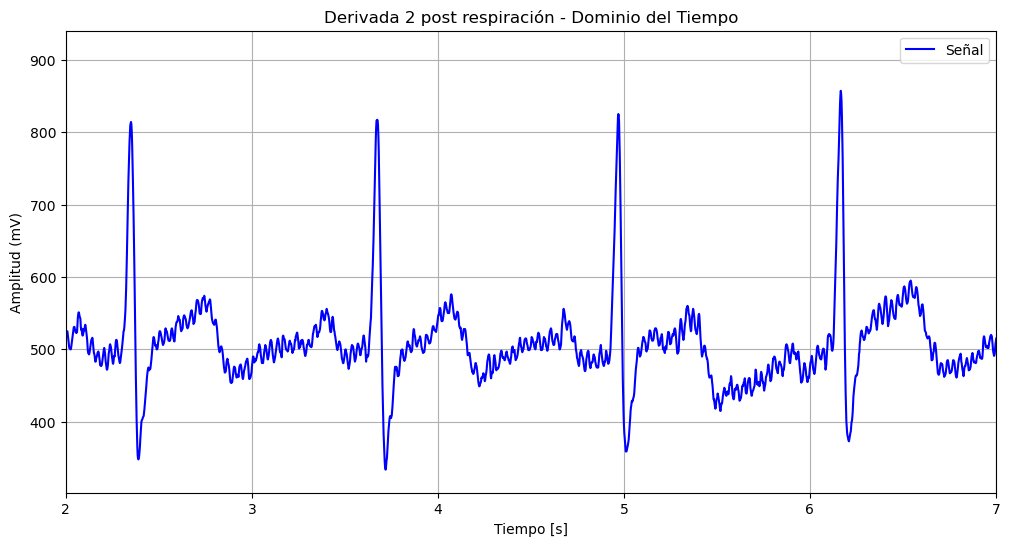

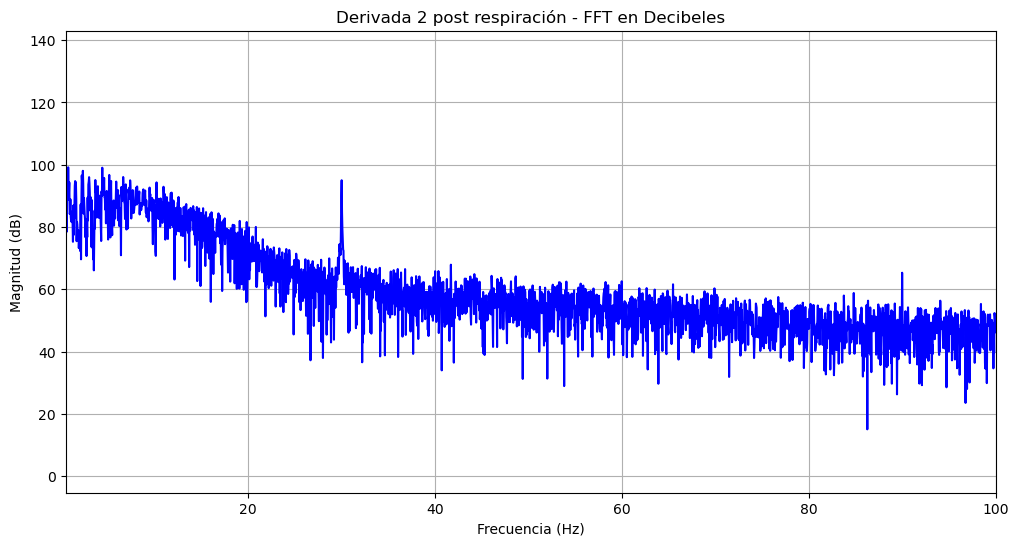

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/postRespD2.txt', comments='#',skiprows=4)

# Extraer la data
postRespD2 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(postRespD2)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(postRespD2, 'Derivada 2 post respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(postRespD2, 'Derivada 2 post respiración', fs)

* 3era derivada

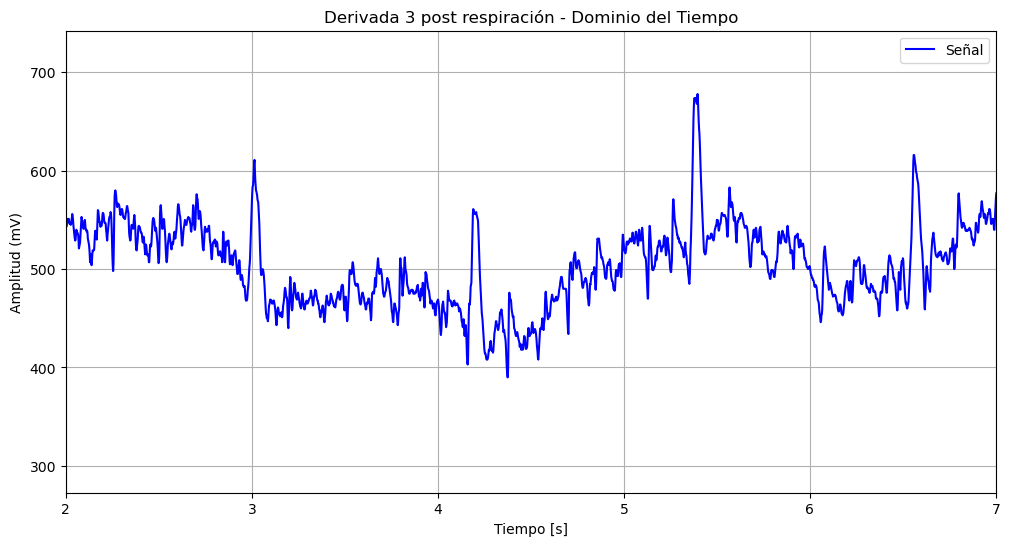

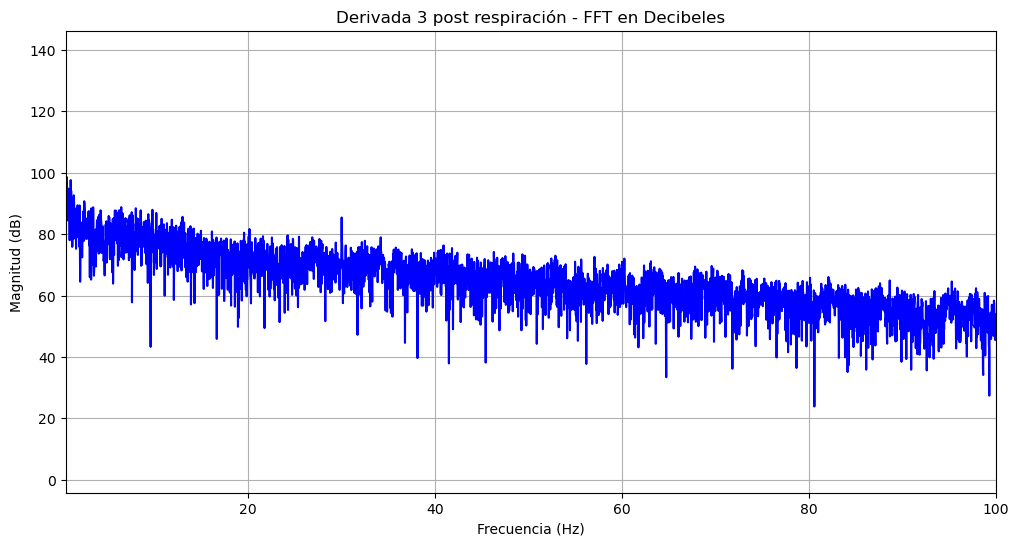

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/postRespD3.txt', comments='#',skiprows=4)

# Extraer la data
postRespD3 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(postRespD3)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(postRespD3, 'Derivada 3 post respiración', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(postRespD3, 'Derivada 3 post respiración', fs)

### **4.5. Después de una actividad física** <a name="id9"></a>

* 1era derivada

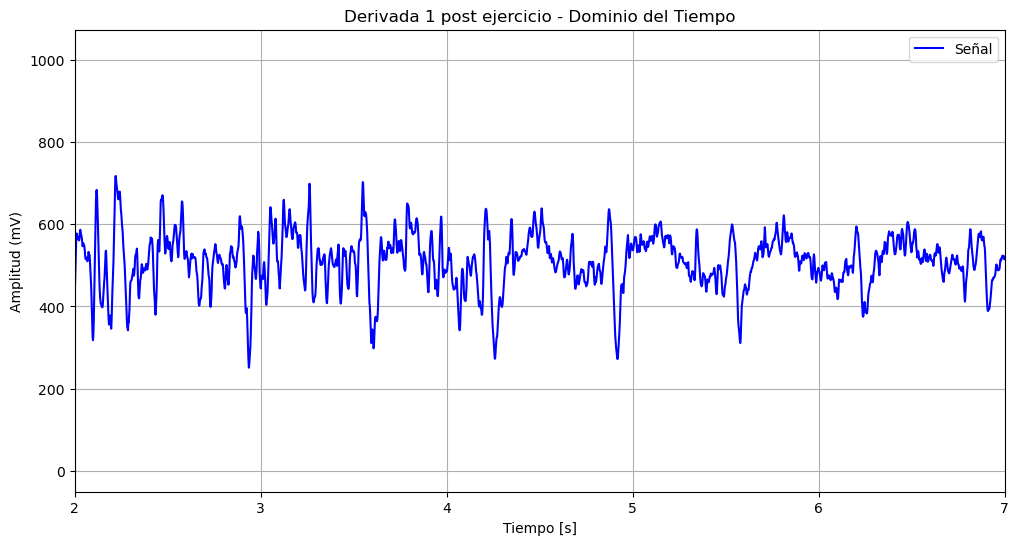

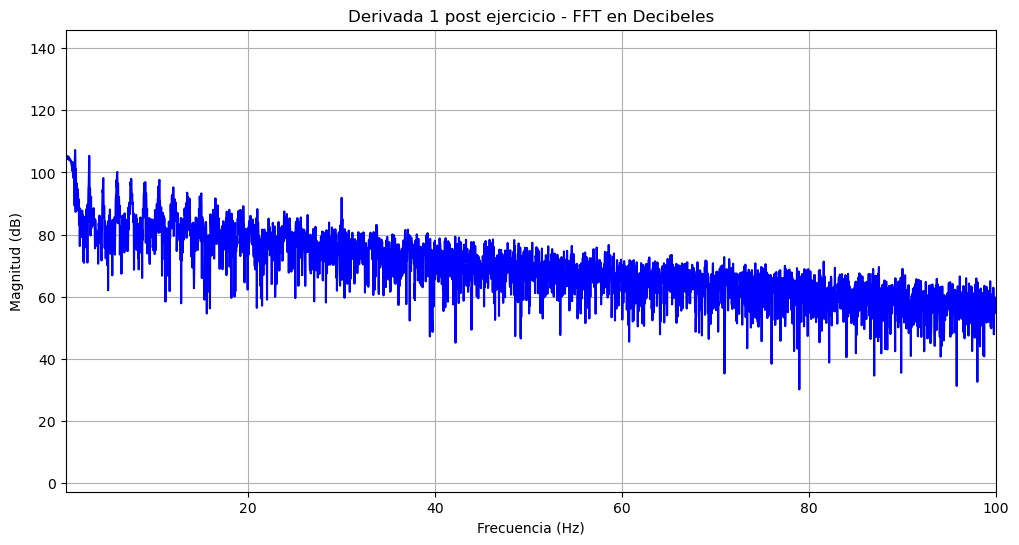

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/EjercicioD1.txt', comments='#',skiprows=4)

# Extraer la data
EjercicioD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(EjercicioD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(EjercicioD1, 'Derivada 1 post ejercicio', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(EjercicioD1, 'Derivada 1 post ejercicio', fs)

* 2da derivada

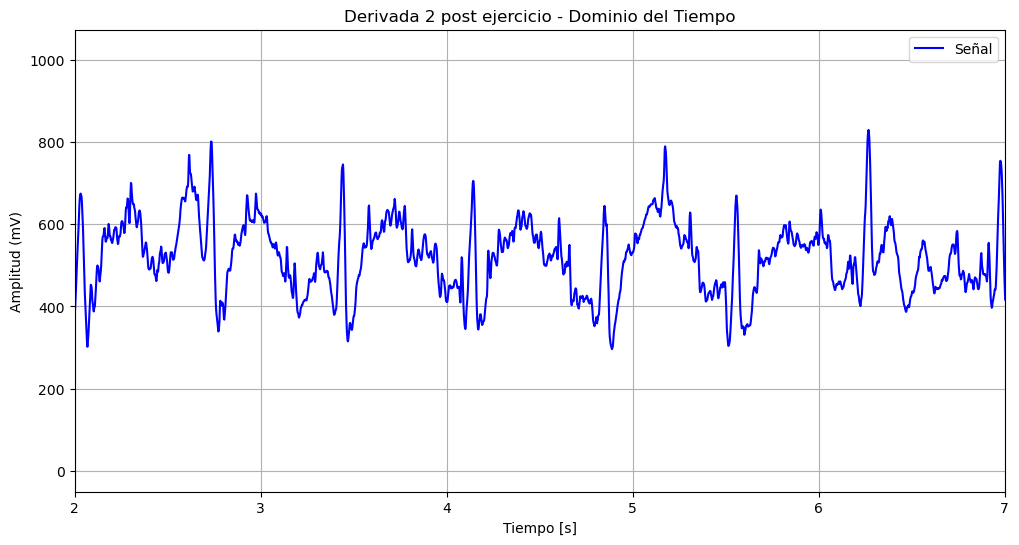

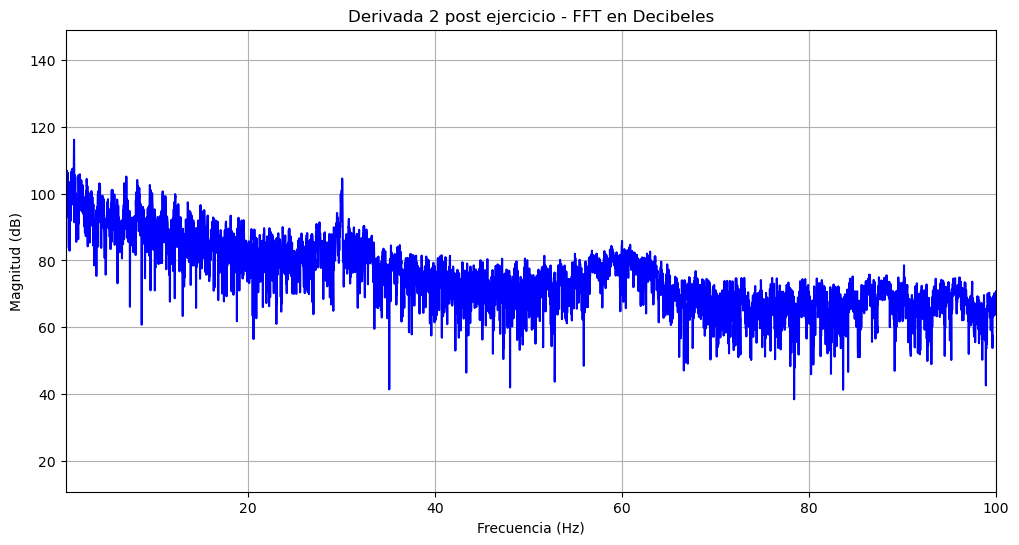

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/EjercicioD2.txt', comments='#',skiprows=4)

# Extraer la data
EjercicioD2 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(EjercicioD2)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(EjercicioD2, 'Derivada 2 post ejercicio', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(EjercicioD2, 'Derivada 2 post ejercicio', fs)

* 3era derivada

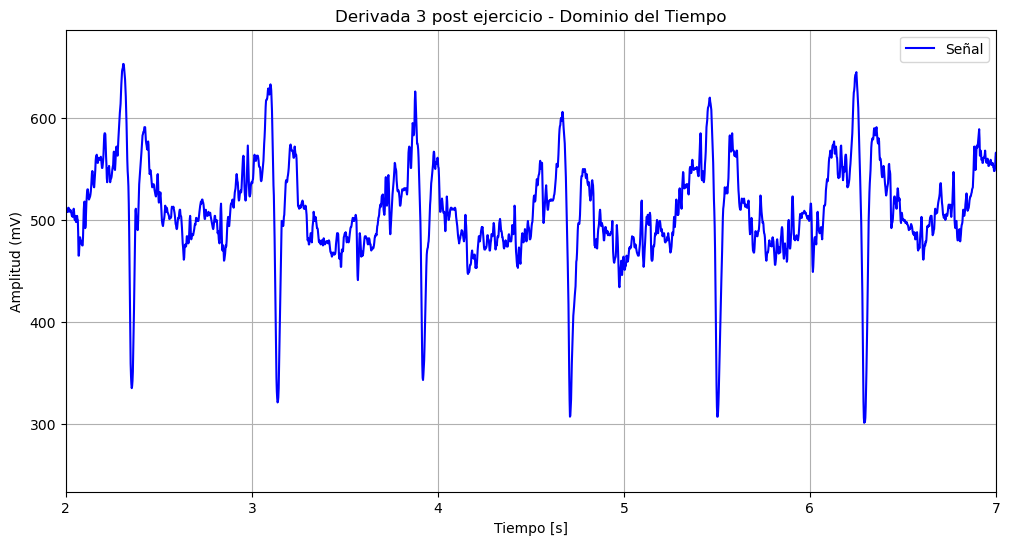

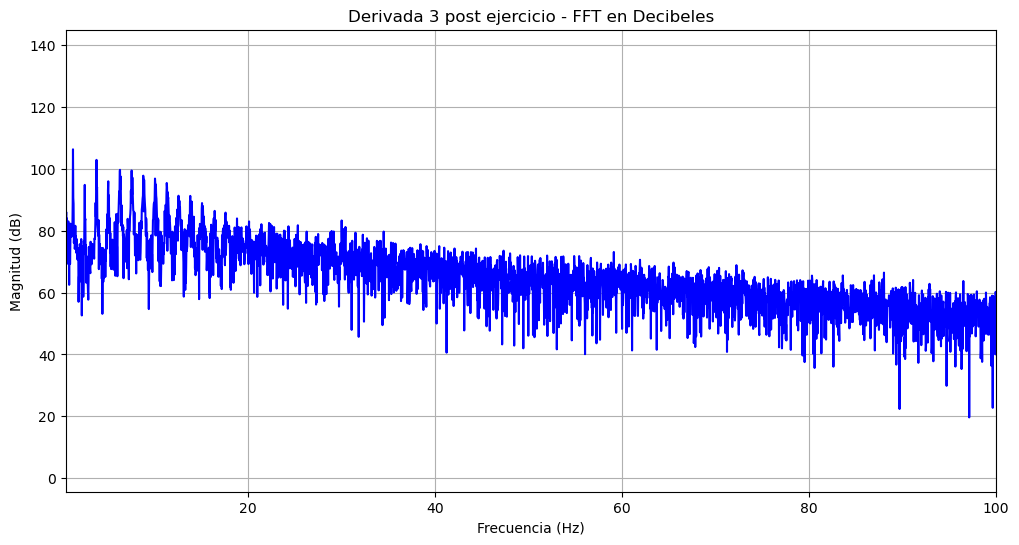

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/EjercicioD3.txt', comments='#',skiprows=4)

# Extraer la data
EjercicioD3 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(EjercicioD3)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(EjercicioD3, 'Derivada 3 post ejercicio', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(EjercicioD3, 'Derivada 3 post ejercicio', fs)

### **4.6. Señal del ProSim 4** <a name="id10"></a>

Frecuencia de 60lpm

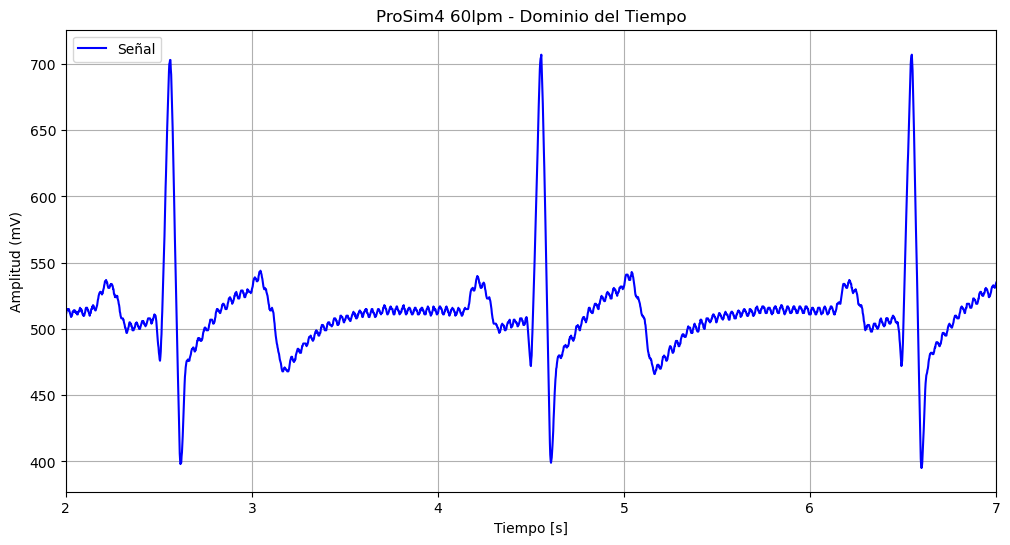

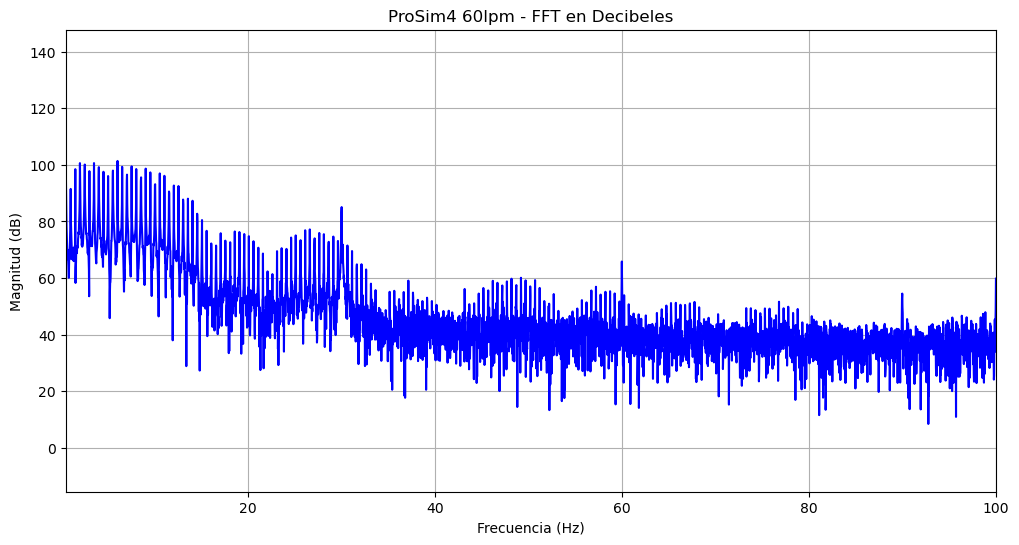

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/sim60.txt', comments='#',skiprows=4)

# Extraer la data
sim60 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(sim60)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(sim60, 'ProSim4 60lpm', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(sim60, 'ProSim4 60lpm', fs)

Frecuencia de 90lpm

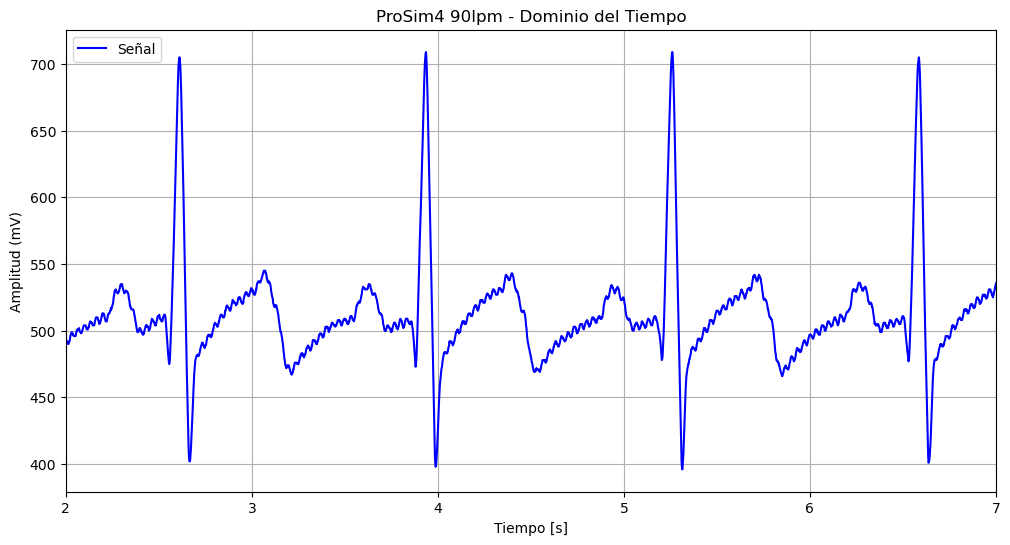

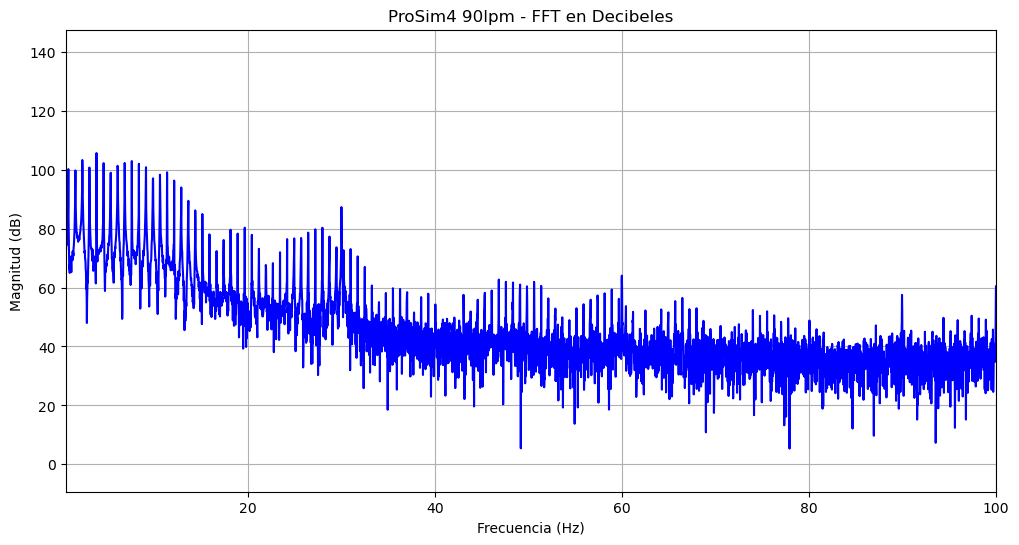

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/sim90.txt', comments='#',skiprows=4)

# Extraer la data
sim90 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(sim90)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(sim90, 'ProSim4 90lpm', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(sim90, 'ProSim4 90lpm', fs)

Frecuencia 120lpm

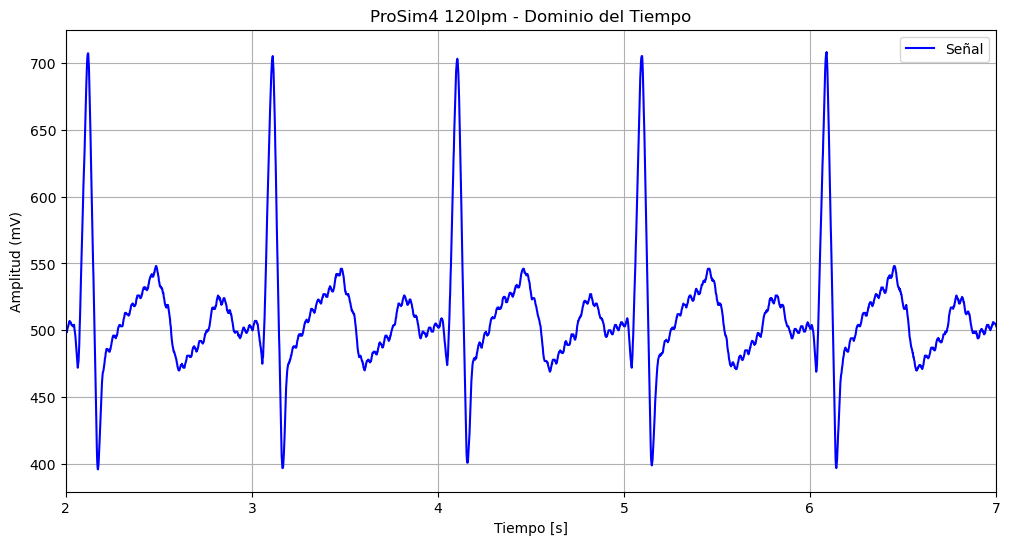

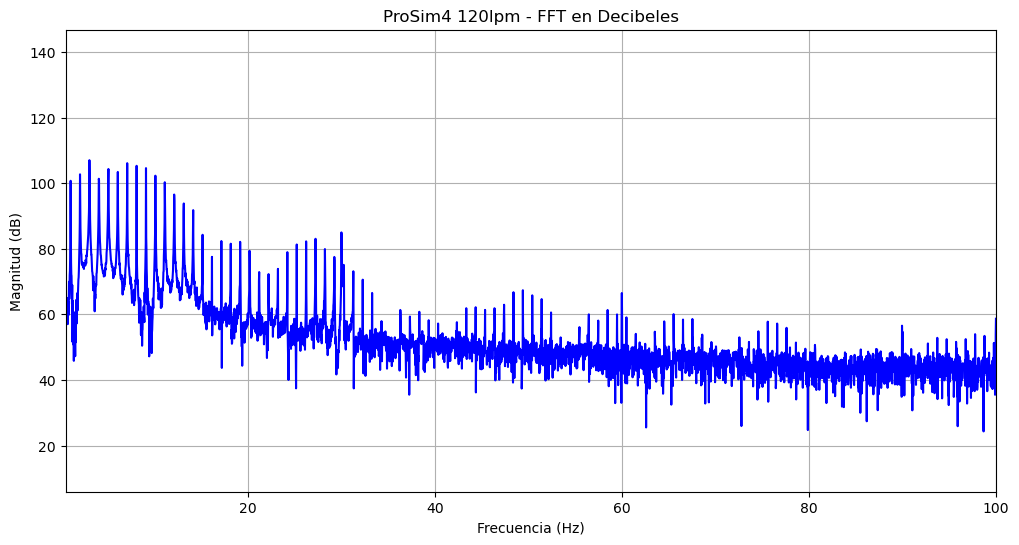

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/sim120.txt', comments='#',skiprows=4)

# Extraer la data
sim120 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(sim120)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(sim120, 'ProSim4 120lpm', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(sim120, 'ProSim4 120lpm', fs)

Frecuencia de 150lpm

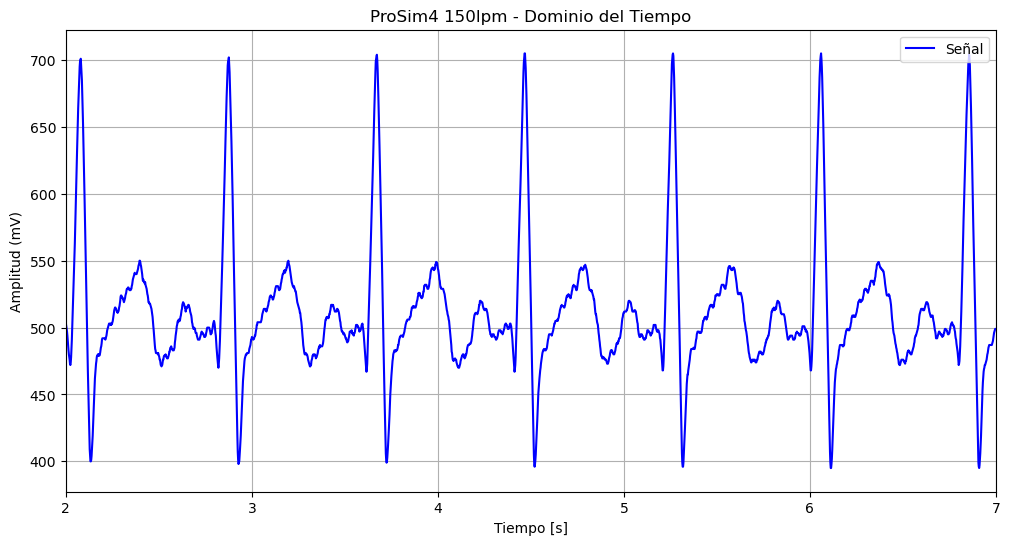

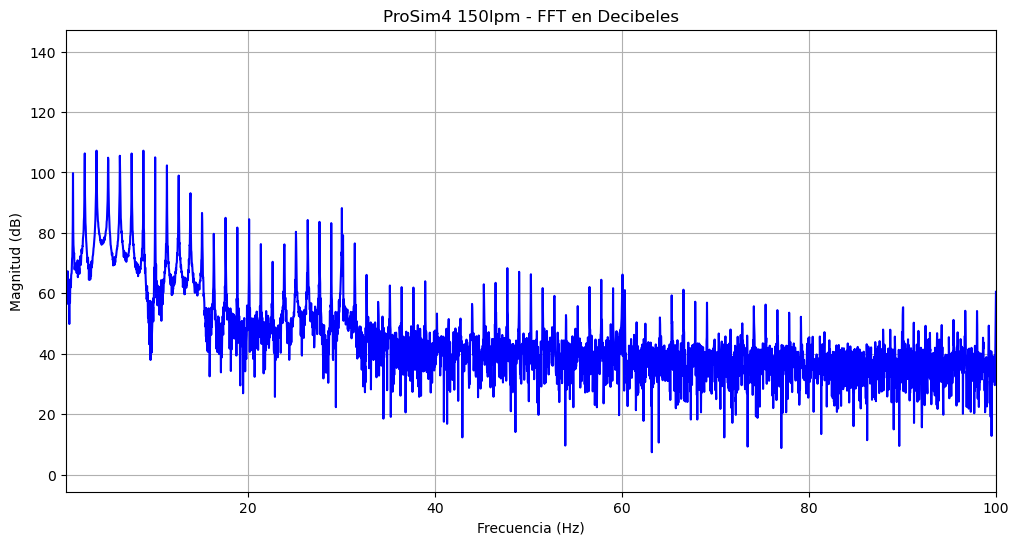

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos desde el archivo
data = np.loadtxt('C:/Users/user/Desktop/Signals/ECG_signals/sim150.txt', comments='#',skiprows=4)

# Extraer la data
sim150 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(sim150)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(2, 7)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Función para calcular el FFT y plotear la señal en el dominio de la frecuencia en decibeles
def plot_frequency_domain(signal, title, fs):
    yf = fft(signal)
    xf = fftfreq(n, 1/fs)[:n//2]  # Frecuencias positivas
    yf_dB = 20 * np.log10(np.abs(yf[:n//2]))  # Convertir la magnitud a decibeles
    
    plt.figure(figsize=(12, 6))
    plt.plot(xf, yf_dB, color='b')
    plt.title(f'{title} - FFT en Decibeles')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.xlim(0.5, 100)  # Limitar a 100 Hz que es el rango para ECG en electrodos superficiales
    plt.grid(True)
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(sim150, 'ProSim4 150lpm', fs)

# Ploteo de la señal en el dominio de la frecuencia
plot_frequency_domain(sim150, 'ProSim4 150lpm', fs)

### **4.7. Archivos** <a name="id11"></a>


- [Documentos (.txt)](https://github.com/Grupo2-IntroduccionSenalesMedicas/S_biomedica/tree/main/Documentos/BiTalino)
- [Programa de ploteo (Jupyter Notebook)](https://github.com/Grupo2-IntroduccionSenalesMedicas/S_biomedica/blob/main/Programaci%C3%B3n/Laboratorio%203/SignalPlot.ipynb)

## **5. Conclusiones** <a name="id12"></a>
---


## **6. Recomendaciones** <a name="id13"></a>
---

## **7. Referencias bibliográficas** <a name="id14"></a>
---